El presente notebook tiene como objetivo presentar ejemplos de aplicacion de los modelos de arboles  tanto para regresion como para clasificacion.

In [45]:
## Conjunto de librerias a usar

# Generales
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import random
import seaborn as sns
import dill
from IPython.display import Image  
import pydotplus

# Clonar modelos creados
from sklearn.base import clone 


## Funciones/Classes para Modelos
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import ShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve
from sklearn import tree


## Preprocesamiento
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler


# Conjunto de Datos a cargar
from sklearn import datasets
from sklearn.datasets import load_digits
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import make_moons
from sklearn.datasets import load_iris


## Clasificadores 
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


## librerias Regresion Lineal
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDRegressor ## Stochastic gradient descent (alternativa Mini-Batch)
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LogisticRegression


## IMPORTANTE: Libreria sklearn
import sklearn as skl ## importar la libreria de sklearn como skl


## SVM 
from sklearn.svm import LinearSVC # clasificacion
from sklearn.svm import LinearSVR # regresion
from sklearn.svm import SVC
from sklearn.svm import SVR

## Trees - Arboles de decisiones
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeRegressor

## advertencias
import warnings
## Ignorar las advertencias
warnings.filterwarnings('ignore')
## warnings.filterwarnings('always') ## mostrar advertencias


## fin

## Arbol de clasificacion

In [30]:
# Clasificador de Arbol - Tree

iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

print('Algunos Datos X:')
print(X[:5])

Algunos Datos X:
[[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]]


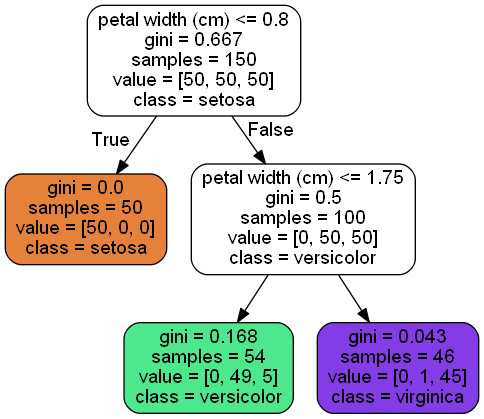

In [31]:
# crear grafico de arbol de decision

datos = tree.export_graphviz(
 tree_clf,
 feature_names=iris.feature_names[2:],
 class_names=iris.target_names,
 rounded=True,
 filled=True)

grafica = pydotplus.graph_from_dot_data(datos)

################################################

# crear pdf
grafica.write_pdf('clasificador.pdf')

## crear png
grafica.write_png('clasificador.png')

#################################################

Image(grafica.create_png()) ## mostrar grafica

# fin

In [44]:
# probar la prediccion del clasificador

print(tree_clf.predict_proba([[5,0.9]]))
print(iris['target_names'][np.argmax(tree_clf.predict_proba([[5,0.9]]))])

print('\nPrediccion:')
print(tree_clf.predict([[5,0.9]]))

[[0.         0.90740741 0.09259259]]
versicolor

Prediccion:
[1]


## Arbol de regresion

In [47]:
# Cargar datos y entrenar modelo

iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.data[:,2]
tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(X, y)

print('Algunos Datos X:')
print(X[:5])

print('Algunos Datos y:')
print(y[:5])

Algunos Datos X:
[[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]]
Algunos Datos y:
[1.4 1.4 1.3 1.5 1.4]


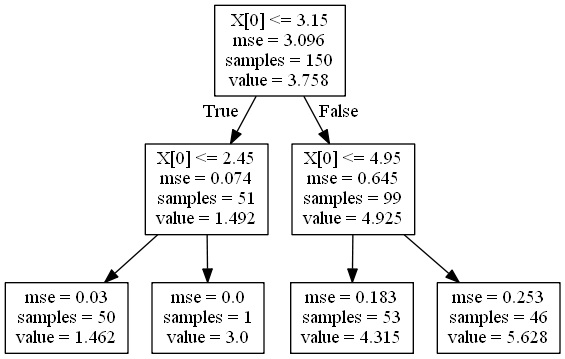

In [51]:
# crear grafico de arbol de decision

datos_r= tree.export_graphviz(
 tree_reg)

grafica_r = pydotplus.graph_from_dot_data(datos_r)

################################################

# crear pdf
grafica_r.write_pdf('regresor.pdf')

## crear png
grafica_r.write_png('regresor.png')

#################################################

Image(grafica_r.create_png()) ## mostrar grafica

# fin